In [1]:
import numpy as np
import xarray as xr

In [3]:
import importlib
import functions as md

importlib.reload(md)  # Reload the module

print(md.__file__)

Matplotlib is building the font cache; this may take a moment.


/home/eroskerouak/physical-geodesy/code/functions.py


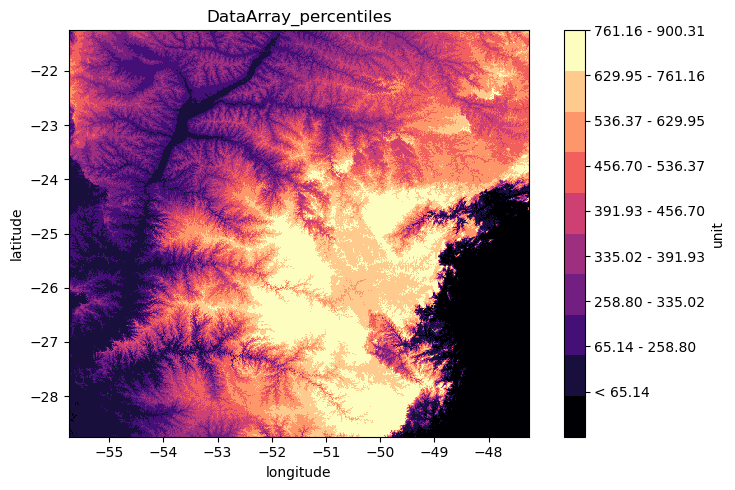

In [4]:
# Importando o MDE

geotiff_path = '../data/MDS_MERIT_SRTM15PLUS_900m_fill.tif'
elevation = md.geotiff_to_dataarray(geotiff_path)
elevation = elevation.rename({'x': 'longitude', 'y': 'latitude'})

md.plot_DataArray_percentiles(
    elevation, 
    x='longitude', 
    y='latitude', 
    label='unit', 
    title='DataArray_percentiles', 
    cmap='magma', 
    num_classes=10
    )

In [ ]:


sin_half = np.sin(psi / 2)
cos_psi = np.cos(psi)


S_psi = (1 / sin_half) - 6 * sin_half + 1 - 5 * cos_psi - 3 * cos_psi * np.log(sin_half**2 + sin_half)

In [7]:
latP = - (25 + 26/60 + 54.12695/3600) # em graus decimais
longP = - (49 + 13/60 + 51.43717/3600) # m graus decimais
lat_geoc = ((1-1e2)*np.tan(np.deg2rad(latP)))

elevationP = elevation.sel(
    latitude=latP, 
    longitude=longP, 
    method="nearest"
    ).values # HP extraído do MDS


print(f"Latitude: {latP}°")
print(f"Longitude: {longP}°")
print(f"lat_geoc: {lat_geoc}°")
print(f"elevationP: {elevationP}m")

Latitude: -25.448368597222224°
Longitude: -49.230954769444445°
lat_geoc: 47.111115712028095°
elevationP: 920.1061401367188m


In [8]:
# Calculate resolution in degrees along the longitude and latitude directions
res_longitude = np.mean(np.abs(np.diff(elevation.coords['longitude'].values)))
res_latitude = np.mean(np.abs(np.diff(elevation.coords['latitude'].values)))
res = np.median([res_longitude, res_latitude]) # Resolução em °
res_metros = round((res * 30)*3600) # Resolução em metros
res_metros_2=res_metros**2 # Resolução em metros ao quadrado


print(f"Resolution in degrees: {res}°")
print(f"Resolution in meters: {res_metros}m")
print(f"Resolution in square meters: {res_metros_2} m²")

Resolution in degrees: 0.008333333333333331°
Resolution in meters: 900m
Resolution in square meters: 810000 m²
